1.What is a Decision Tree, and how does it work?

- A Decision Tree is a flowchart-like structure used for classification or regression.
- It splits data into branches based on feature values using criteria like Gini index or entropy.
- Each internal node tests a feature, each branch represents an outcome, and each leaf node gives a prediction.
- The tree keeps splitting until stopping criteria are met (e.g., max depth, minimum samples).


2.What are impurity measures in Decision Trees?

Impurity measures evaluate how mixed the classes are at a node. Common impurity measures:

- **Gini Impurity:** Probability of misclassification; used in CART.
- **Entropy:** Measures information gain; used in ID3 and C4.5.
- **Classification Error:** Simple error rate at a node (less used).

Lower impurity means better node purity.


3.What is the mathematical formula for Gini Impurity?

Gini Impurity = 1 - Σ (pᵢ)²  
Where:
- pᵢ = proportion of class i in the node
- Σ = summation over all classes

It measures the probability of incorrect classification at a node.


4.What is the mathematical formula for Entropy?

Entropy = - Σ (pᵢ * log₂(pᵢ))  
Where:
- pᵢ = proportion of class i in the node
- Σ = summation over all classes

It measures the impurity or uncertainty in a node.


5.What is Information Gain, and how is it used in Decision Trees?

- Information Gain = Entropy(parent) - [Weighted avg. Entropy(children)]
- It measures the reduction in entropy after a dataset is split on an attribute.
- Higher information gain means better feature for splitting.
- Decision Trees use it to choose the best feature at each node.


6.What is the difference between Gini Impurity and Entropy?

- **Gini Impurity** is calculated as: 1 - Σ(pᵢ²)
- **Entropy** is calculated as: -Σ(pᵢ * log₂(pᵢ))

Differences:
- Gini is faster to compute (no logarithms).
- Entropy is more informative theoretically.
- Both yield similar trees; choice depends on preference or algorithm (e.g., CART uses Gini).


7.What is the mathematical explanation behind Decision Trees?

- At each node, the dataset is split using a feature that maximizes Information Gain (or minimizes Gini Impurity).
- For each feature:
   1. Calculate Entropy or Gini of parent node.
   2. Split data based on feature.
   3. Calculate weighted average impurity of child nodes.
   4. Compute Information Gain = Parent Impurity - Child Impurity.
- Select the feature with highest Information Gain to split.
- Repeat recursively until stopping criteria is met (e.g., pure node or max depth).


8.What is Pre-Pruning in Decision Trees?

- Pre-pruning stops the tree growth early to avoid overfitting.
- It sets conditions like:
  - Maximum depth of the tree
  - Minimum samples required to split a node
  - Minimum gain in impurity for a split
- It prevents the tree from becoming too complex.


9.What is Post-Pruning in Decision Trees?

- Post-pruning allows the tree to grow fully and then removes unnecessary branches.
- It simplifies the tree by:
  - Replacing subtrees with leaf nodes if they do not improve accuracy.
  - Using a validation set or cross-validation to evaluate performance.
- It helps reduce overfitting and improves generalization.


10.What is the difference between Pre-Pruning and Post-Pruning?

- Pre-Pruning:
  - Stops tree growth early based on criteria (e.g., max depth, min samples).
  - Prevents overfitting before it happens.
  - Faster but may underfit.

- Post-Pruning:
  - Grows full tree first, then removes unnecessary branches.
  - Uses validation data to prune.
  - More accurate but computationally expensive.


11.What is a Decision Tree Regressor?

- A Decision Tree Regressor predicts continuous target values.
- It splits data based on features to minimize variance (e.g., using mean squared error) in child nodes.
- Each leaf node contains a predicted value (usually the mean of targets in that node).
- Used for regression tasks instead of classification.


12.What are the advantages and disadvantages of Decision Trees?

Advantages:
- Easy to understand and interpret.
- Requires little data preprocessing.
- Can handle both numerical and categorical data.
- Non-linear relationships can be modeled.
- Useful for both classification and regression.

Disadvantages:
- Prone to overfitting if not pruned.
- Can be unstable; small data changes can create different trees.
- Biased towards features with more levels.
- May not perform well compared to ensemble methods.


13.How does a Decision Tree handle missing values?

- Some implementations handle missing values by:
  - Splitting data using surrogate splits (alternative features).
  - Assigning missing values to the most frequent category or mean.
  - Using probabilistic splits based on available data.
- Handling depends on the algorithm and library used.


14.How does a Decision Tree handle categorical features?

- Decision Trees split data based on categories by:
  - Creating branches for each category (multi-way split), or
  - Grouping categories into subsets to form binary splits.
- Algorithms like CART convert categorical features into binary splits.
- No need for one-hot encoding in some implementations.


15.What are some real-world applications of Decision Trees?

- Credit scoring and risk assessment in banking.
- Medical diagnosis and patient classification.
- Customer segmentation and marketing analysis.
- Fraud detection in finance.
- Predictive maintenance in manufacturing.
- Loan approval decisions.
- Churn prediction in telecom.


16.Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Accuracy: 1.0000


17.Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the
feature importances

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

# Train Decision Tree Classifier with Gini criterion
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X, y)

# Print feature importances
for feature, importance in zip(feature_names, model.feature_importances_):
    print(f"{feature}: {importance:.4f}")


sepal length (cm): 0.0133
sepal width (cm): 0.0000
petal length (cm): 0.5641
petal width (cm): 0.4226


18.Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the
model accuracy

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier with Entropy criterion
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Accuracy: 1.0000


19.Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean
Squared Error (MSE)

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.4952


20.Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Export tree in DOT format
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualize the tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves as decision_tree.pdf
graph.view()  # Opens the visualization


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

21.Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its
accuracy with a fully grown tree

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree with max_depth=3
model_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
model_limited.fit(X_train, y_train)
y_pred_limited = model_limited.predict(X_test)
acc_limited = accuracy_score(y_test, y_pred_limited)

# Train fully grown Decision Tree (no max_depth)
model_full = DecisionTreeClassifier(random_state=42)
model_full.fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

print(f"Accuracy with max_depth=3: {acc_limited:.4f}")
print(f"Accuracy with fully grown tree: {acc_full:.4f}")


Accuracy with max_depth=3: 1.0000
Accuracy with fully grown tree: 1.0000


22.Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its
accuracy with a default tree

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree with min_samples_split=5
model_min_split = DecisionTreeClassifier(min_samples_split=5, random_state=42)
model_min_split.fit(X_train, y_train)
y_pred_min_split = model_min_split.predict(X_test)
acc_min_split = accuracy_score(y_test, y_pred_min_split)

# Train default Decision Tree
model_default = DecisionTreeClassifier(random_state=42)
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

print(f"Accuracy with min_samples_split=5: {acc_min_split:.4f}")
print(f"Accuracy with default min_samples_split: {acc_default:.4f}")


Accuracy with min_samples_split=5: 1.0000
Accuracy with default min_samples_split: 1.0000


23.Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its
accuracy with unscaled data

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train on unscaled data
model_unscaled = DecisionTreeClassifier(random_state=42)
model_unscaled.fit(X_train, y_train)
y_pred_unscaled = model_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train on scaled data
model_scaled = DecisionTreeClassifier(random_state=42)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy on unscaled data: {acc_unscaled:.4f}")
print(f"Accuracy on scaled data: {acc_scaled:.4f}")


Accuracy on unscaled data: 1.0000
Accuracy on scaled data: 1.0000


24.Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass
classification

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-vs-Rest with Decision Tree
ovr_model = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = ovr_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Accuracy: 1.0000


25.Write a Python program to train a Decision Tree Classifier and display the feature importance scores

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

# Train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Display feature importance scores
for name, importance in zip(feature_names, model.feature_importances_):
    print(f"{name}: {importance:.4f}")


sepal length (cm): 0.0133
sepal width (cm): 0.0000
petal length (cm): 0.5641
petal width (cm): 0.4226


26.Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance
with an unrestricted tree

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor with max_depth=5
model_limited = DecisionTreeRegressor(max_depth=5, random_state=42)
model_limited.fit(X_train, y_train)
y_pred_limited = model_limited.predict(X_test)
mse_limited = mean_squared_error(y_test, y_pred_limited)

# Unrestricted Decision Tree Regressor
model_full = DecisionTreeRegressor(random_state=42)
model_full.fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)

print(f"MSE with max_depth=5: {mse_limited:.4f}")
print(f"MSE with unrestricted tree: {mse_full:.4f}")


MSE with max_depth=5: 0.5245
MSE with unrestricted tree: 0.4952


27.Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and
visualize its effect on accuracy

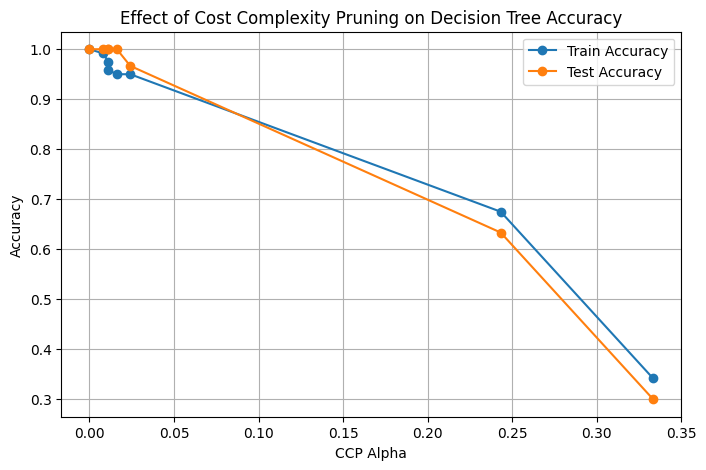

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train initial Decision Tree to get ccp_alphas
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train trees for different alpha values
train_acc = []
test_acc = []
for ccp_alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_pruned.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf_pruned.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf_pruned.predict(X_test)))

# Plot accuracy vs alpha
plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, train_acc, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_acc, marker='o', label='Test Accuracy')
plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy")
plt.title("Effect of Cost Complexity Pruning on Decision Tree Accuracy")
plt.legend()
plt.grid(True)
plt.show()


28.Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision,
Recall, and F1-Score

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# For binary classification, let's select only two classes
X = X[y != 2]
y = y[y != 2]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


29.Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn

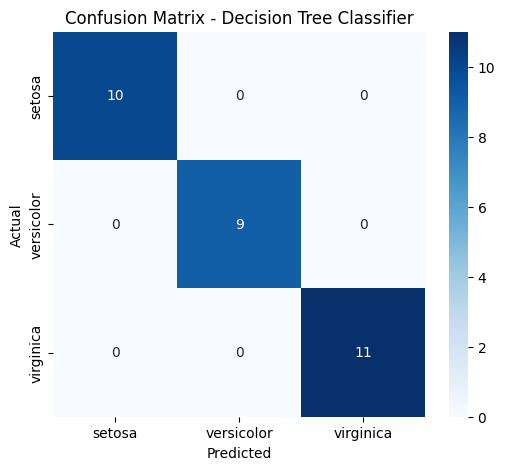

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot with seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


30.Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values
for max_depth and min_samples_split

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameters grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': 4, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9416666666666668
